In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
file_Path = pd.read_csv("spotify_history.csv")
df = pd.DataFrame(file_Path)
print(df.head())

        spotify_track_uri                   ts    platform  ms_played  \
0  2J3n32GeLmMjwuAzyhcSNe  2013-07-08 02:44:34  web player       3185   
1  1oHxIPqJyvAYHy0PVrDU98  2013-07-08 02:45:37  web player      61865   
2  487OPlneJNni3NWC8SYqhW  2013-07-08 02:50:24  web player     285386   
3  5IyblF777jLZj1vGHG2UD3  2013-07-08 02:52:40  web player     134022   
4  0GgAAB0ZMllFhbNc3mAodO  2013-07-08 03:17:52  web player          0   

                                      track_name        artist_name  \
0                            Say It, Just Say It       The Mowgli's   
1  Drinking from the Bottle (feat. Tinie Tempah)      Calvin Harris   
2                                    Born To Die       Lana Del Rey   
3                               Off To The Races       Lana Del Rey   
4                                      Half Mast  Empire Of The Sun   

                           album_name reason_start reason_end  shuffle  \
0                Waiting For The Dawn     autoplay   clickro

In [4]:
df.isnull().sum()

spotify_track_uri      0
ts                     0
platform               0
ms_played              0
track_name             0
artist_name            0
album_name             0
reason_start         143
reason_end           117
shuffle                0
skipped                0
dtype: int64

In [5]:
df.fillna(0,inplace =True)

In [6]:
df.dtypes

spotify_track_uri    object
ts                   object
platform             object
ms_played             int64
track_name           object
artist_name          object
album_name           object
reason_start         object
reason_end           object
shuffle                bool
skipped                bool
dtype: object

In [6]:
df["ts"] = pd.to_datetime(df["ts"])

In [9]:
df["artist_name"] = df["artist_name"].astype("category")

In [11]:
unique_artist = df["artist_name"].unique()
print(unique_artist)

['The Mowgli's', 'Calvin Harris', 'Lana Del Rey', 'Empire Of The Sun', 'James Arthur', ..., 'Dinah Washington', 'Smiley Stevens', 'Rudy Snow', 'Ultra Band', 'Jesse Welles']
Length: 4113
Categories (4113, object): ['"Weird Al" Yankovic', '& Friends', '*NSYNC', '.Sinh', ..., 'ゼロ戦', '岸正之', '石橋和子', '落日飛車 Sunset Rollercoaster']


In [12]:
df['artist_name'] = df['artist_name'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)

print(df['artist_name'].unique())


['The Mowglis' 'Calvin Harris' 'Lana Del Rey' ... 'Rudy Snow' 'Ultra Band'
 'Jesse Welles']


C:\Users\deepa\AppData\Local\Temp\ipykernel_12240\1542477389.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "artist_name",


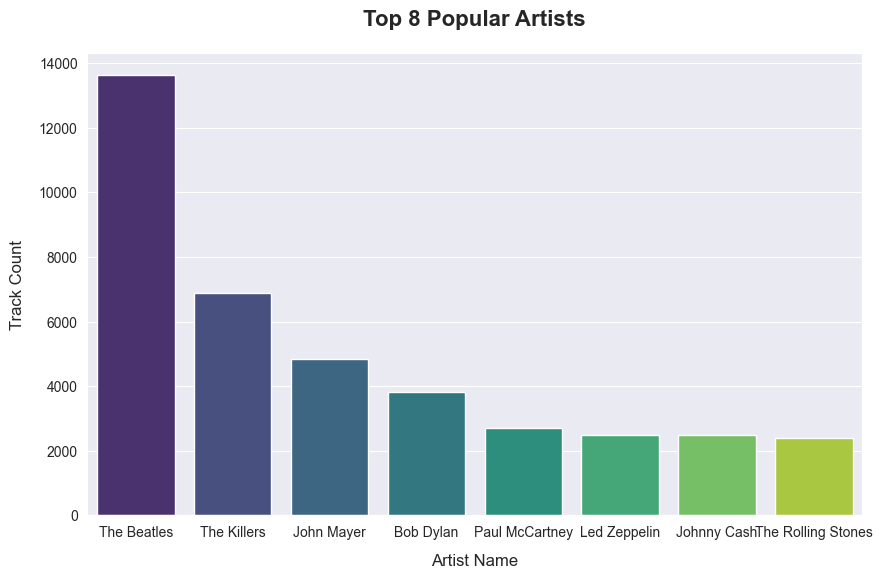

In [16]:
Top_8_popular_artist= df["artist_name"].value_counts().head(8).index

plt.figure(figsize = (10,6))

sns.countplot(x = "artist_name",
              data = df[df["artist_name"].isin(Top_8_popular_artist)],
              palette = "viridis",
              order = Top_8_popular_artist
              )

plt.title("Top 8 Popular Artists",fontsize= 16, fontweight = "bold",pad = 20)
plt.xlabel("Artist Name",fontsize= 12,labelpad = 10)
plt.ylabel("Track Count",fontsize= 12,labelpad = 10)
plt.show()

* Top Popular Artist is The Beatles


In [24]:
df["album_name"] = df["album_name"].astype("category")
print(df["album_name"].unique())

df['album_name'] = df['album_name'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)
print(df['album_name'].unique())

['Waiting For The Dawn', '18 Months', 'Born To Die - The Paradise Edition', 'Walking On A Dream', 'Impossible', ..., 'Essência Feminina Internacional', 'Hells Welles', 'Patchwork', 'Oo-De-Lally', 'King Of The Road']
Length: 7948
Categories (7948, object): ['!!Going Places!!', '"Awaken, My Love!"', '"Feel Flows" The Sunflower & Surf’s Up Sessio..., '"Heroes"', ..., 'スーパー・セレクション', '図鑑', '愛犬と共に過ごす暖かい冬の日', '母親']
['Waiting For The Dawn' '18 Months' 'Born To Die  The Paradise Edition'
 ... 'Patchwork' 'OoDeLally' 'King Of The Road']


C:\Users\deepa\AppData\Local\Temp\ipykernel_12240\507489461.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


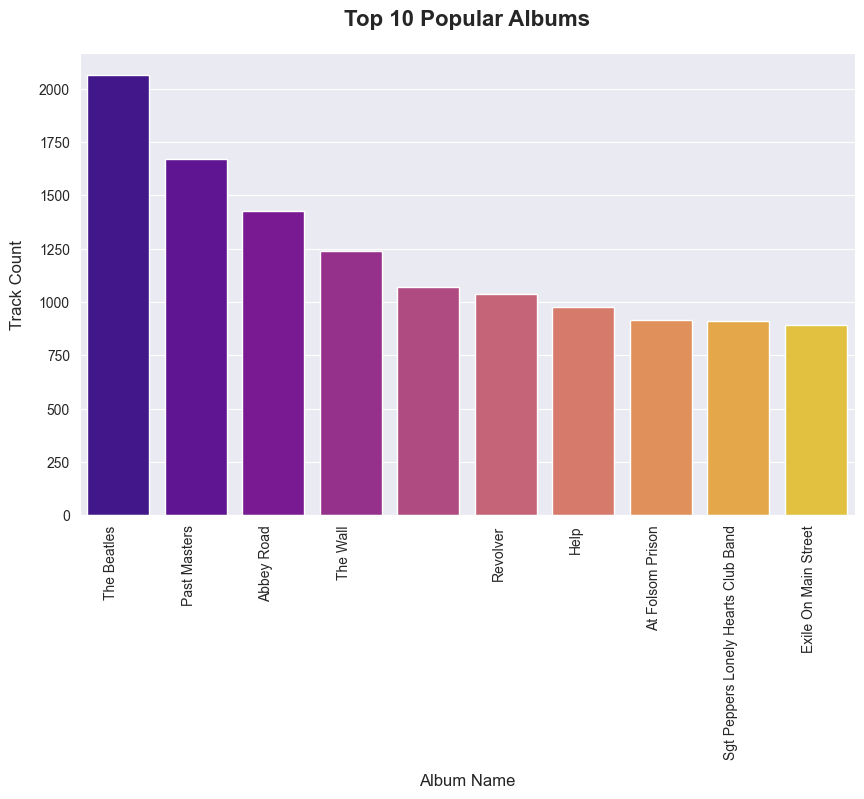

In [25]:
Top_10_popular_album = df["album_name"].value_counts().head(10).index
plt.figure(figsize = (10,6))

sns.countplot(
    x = "album_name",
    data = df[df["album_name"].isin(Top_10_popular_album)],
    palette = "plasma",
    order = Top_10_popular_album,
    legend = False

)
plt.title("Top 10 Popular Albums",fontsize= 16, fontweight = "bold",pad = 20)
plt.xlabel("Album Name",fontsize = 12,labelpad = 10)
plt.ylabel("Track Count", fontsize = 12, labelpad = 10)
plt.xticks(rotation = 90,ha ="right")
plt.show()

* Most Listing Album is The Beatles

In [26]:
df.columns

Index(['spotify_track_uri', 'ts', 'platform', 'ms_played', 'track_name',
       'artist_name', 'album_name', 'reason_start', 'reason_end', 'shuffle',
       'skipped'],
      dtype='object')

In [29]:
Top_device = df["platform"].unique()

C:\Users\deepa\AppData\Local\Temp\ipykernel_12240\2184637058.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


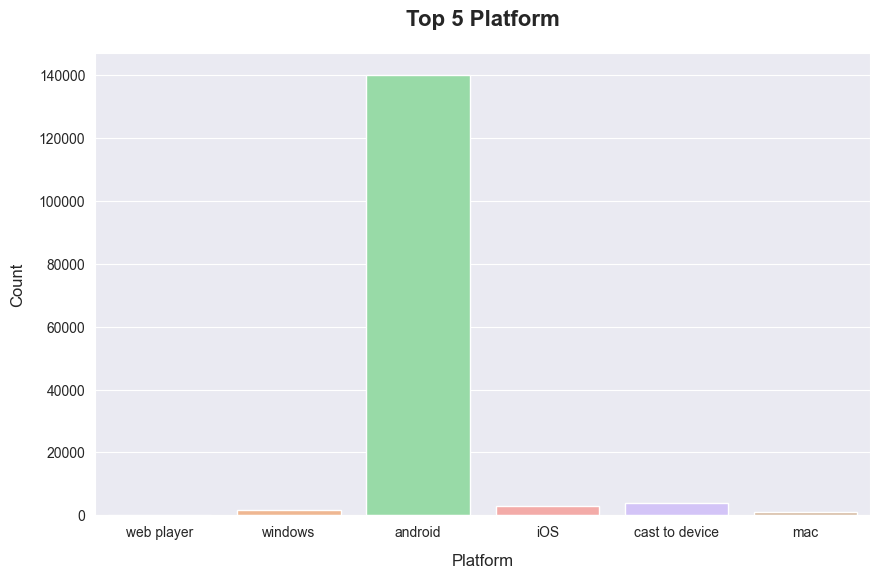

In [35]:
plt.figure(figsize = (10,6))

sns.countplot(
    x = "platform",
    data = df,
    palette = "pastel",
    order = Top_device
)

plt.title("Top 5 Platform",fontsize = 16,fontweight = "bold",pad = 20)
plt.xlabel("Platform",fontsize = 12,labelpad = 10)
plt.ylabel("Count", fontsize = 12,labelpad = 10)
plt.show()

Most Use Platform is Android

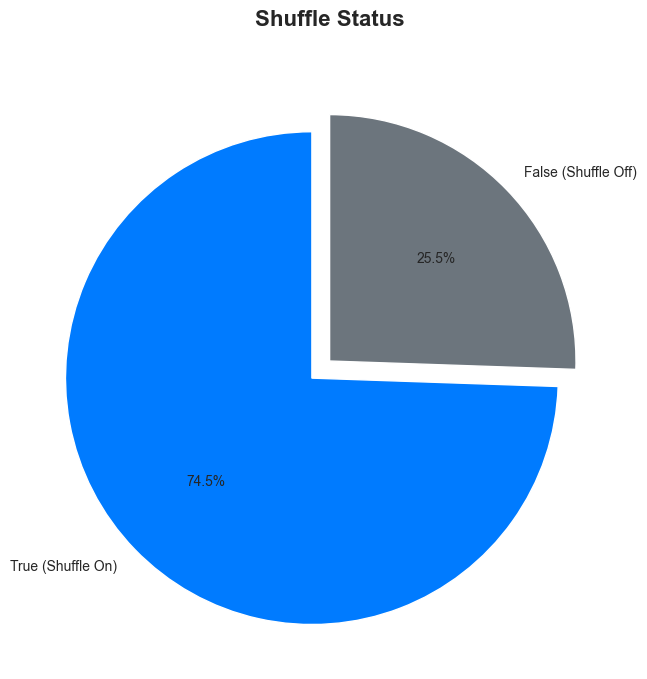

In [40]:
shuffle_count = df["shuffle"].value_counts()
labels = list[shuffle_count]
values = shuffle_count.values

plt.figure(figsize = (8,8))

plt.pie(values,
        labels = ["True (Shuffle On)","False (Shuffle Off)"],
        autopct = "%1.1f%%",
        startangle = 90,
        colors= ["#007bff","#6c757d"],
        explode = (0.1,0)
)

plt.title("Shuffle Status",fontsize = 16,fontweight = "bold",pad = 20)
plt.show()

* Most People choice listing song Shuffle

In [43]:
skipped_count = df["skipped"].value_counts()
print(skipped_count)


skipped
False    141991
True       7869
Name: count, dtype: int64


In [45]:
df["skipped"] = df["skipped"].astype("category")
print(df["skipped"].unique())

[False, True]
Categories (2, bool): [False, True]


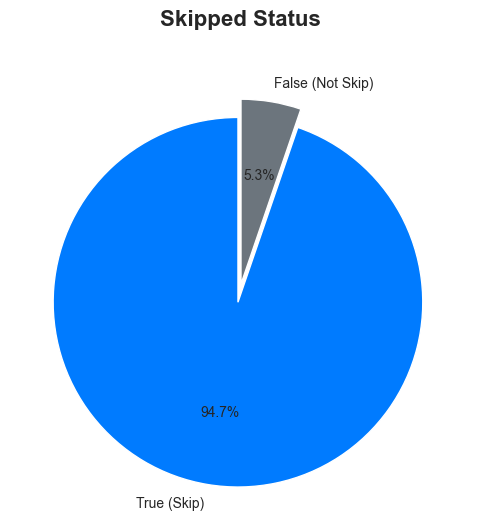

In [46]:
plt.figure(figsize = (10,6))
plt.pie(
    skipped_count,
    labels = ["True (Skip)","False (Not Skip)"],
    autopct = "%1.1f%%",
    startangle = 90,
    colors = ["#007bff","#6c757d"],
    explode = (0.1,0)

)
plt.title("Skipped Status",fontsize = 16,fontweight = "bold",pad = 20)
plt.show()

Most listener want to skips Songs

In [7]:
df["month"] = df["ts"].dt.month_name()
print(df["month"].unique())

['July' 'August' 'September' 'January' 'June' 'October' 'November'
 'December' 'February' 'May' 'March' 'April']


C:\Users\deepa\AppData\Local\Temp\ipykernel_3352\986907477.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


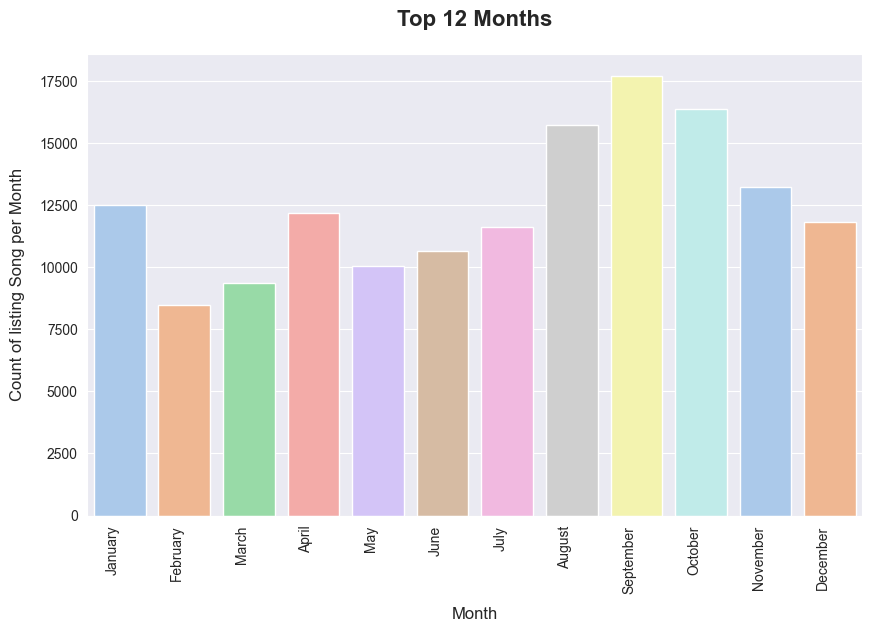

In [10]:
plt.figure(figsize = (10,6))
sns.countplot(
    x = "month",
    data = df,
    palette = "pastel",
    order = ["January","February","March","April","May","June","July","August","September","October","November","December"],
    legend = False
)
plt.title("Top 12 Months",fontsize = 16,fontweight = "bold",pad = 20)
plt.xlabel("Month",fontsize = 12,labelpad = 10)
plt.ylabel("Count of listing Song per Month",fontsize = 12,labelpad = 10)
plt.xticks(rotation = 90,ha = "right")
plt.show()

### Contextual Summary for Each Insight:
- **The Beatles** being the most popular artist highlights their global audience appeal, even in streaming contexts.
- **The Beatles album** being the most played shows a strong correlation between their popularity and album listenership.
- **Android**'s dominance suggests that a significant portion of users access Spotify through Android devices.
- The preference for **shuffle mode** indicates that users often enjoy randomized playback, potentially for variety.
- **Skipping songs** frequently can indicate dissatisfaction with certain tracks or the desire for a more tailored listening experience.
- The most listened months and validate that **September, October, and August** stand out.

